# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Installing Package with Country Codes

In [4]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


In [188]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the Data

In [9]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* Numbers of Columns and Name 
* Columns Name 
* Are there any NaN values or duplicates?

In [11]:
df.shape

(4324, 9)

In [101]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,iso_alpha
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Japan,JPN


In [90]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country',
       'iso_alpha'],
      dtype='object')

In [12]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [94]:
dt = df.dropna()  



## Data Cleaning 



In [15]:
dt.isnull().sum()


Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

## Descriptive Statistics

# Number of Launches per Company


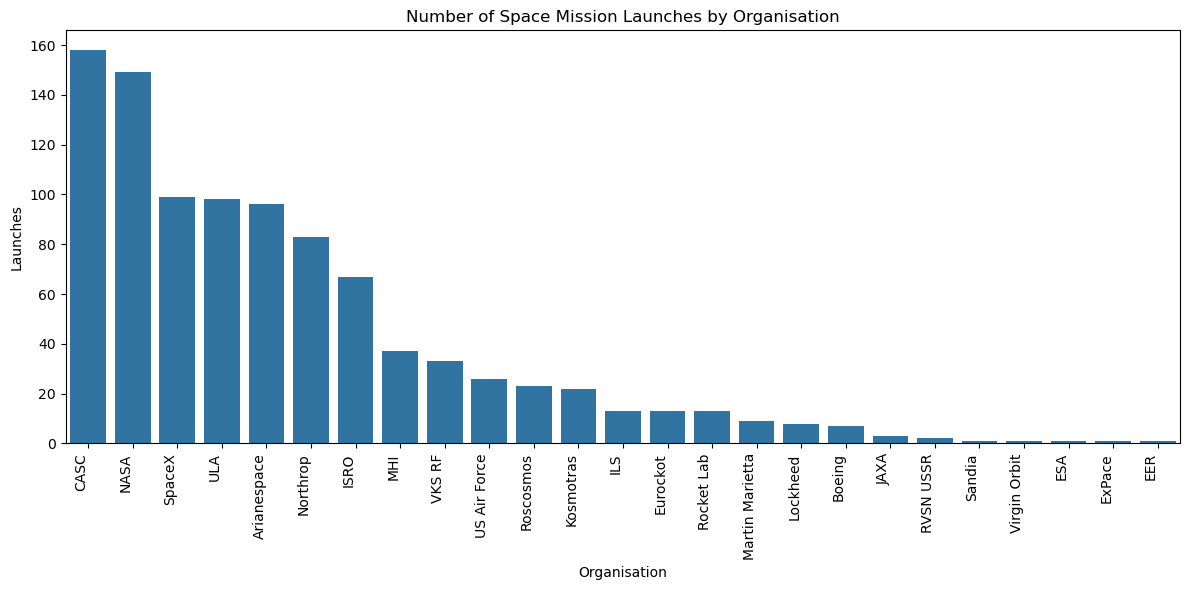

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count number of launches per organisation
org_counts = dt['Organisation'].value_counts().reset_index()
org_counts.columns = ['Organisation', 'Launches']

plt.figure(figsize=(12, 6))
sns.barplot(data=org_counts, x='Organisation', y='Launches')
plt.xticks(rotation=90, ha='right')
plt.title('Number of Space Mission Launches by Organisation')
plt.tight_layout()
plt.show()


# Number of Active versus Retired Rockets


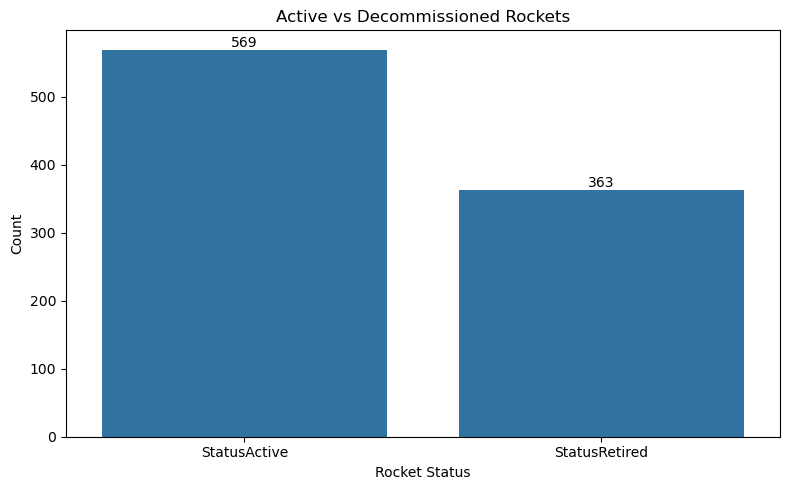

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt


status_counts = dt['Rocket_Status'].value_counts().reset_index()
status_counts.columns = ['Rocket Status', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=status_counts, x='Rocket Status', y='Count')
ax.bar_label(ax.containers[0])


plt.title('Active vs Decommissioned Rockets')
plt.tight_layout()
plt.show()


# Number of Success vs Failed Missions



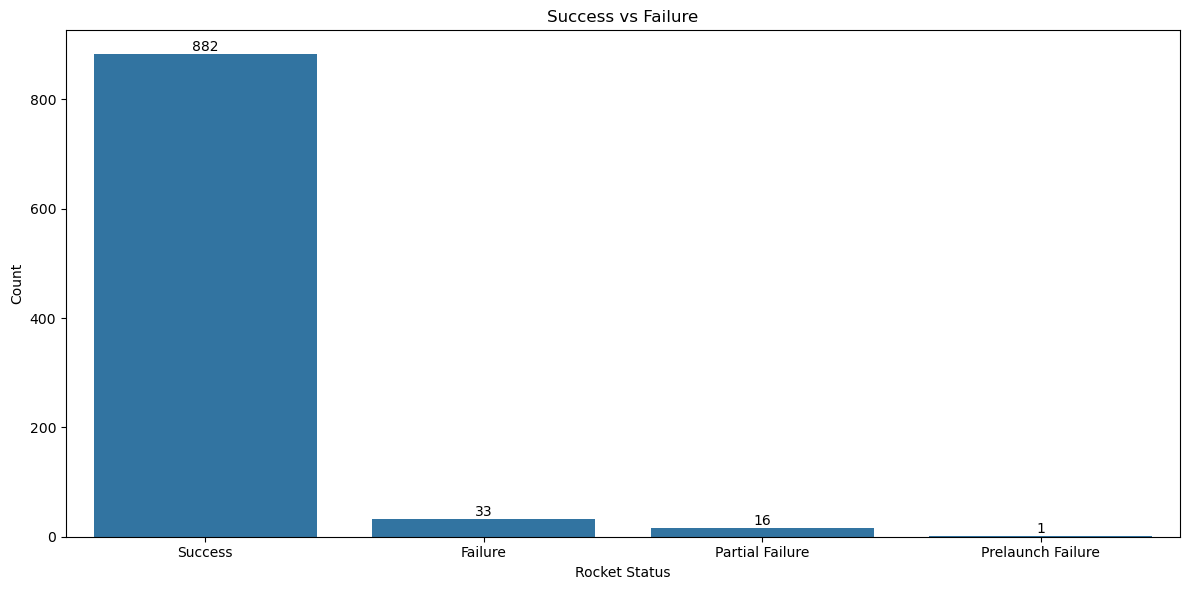

In [104]:
status_counts = dt['Mission_Status'].value_counts().reset_index()
status_counts.columns = ['Rocket Status', 'Count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=status_counts, x='Rocket Status', y='Count')
ax.bar_label(ax.containers[0])
plt.title("Success vs Failure")
plt.tight_layout()
plt.show()


# Total Cost of the Launches:


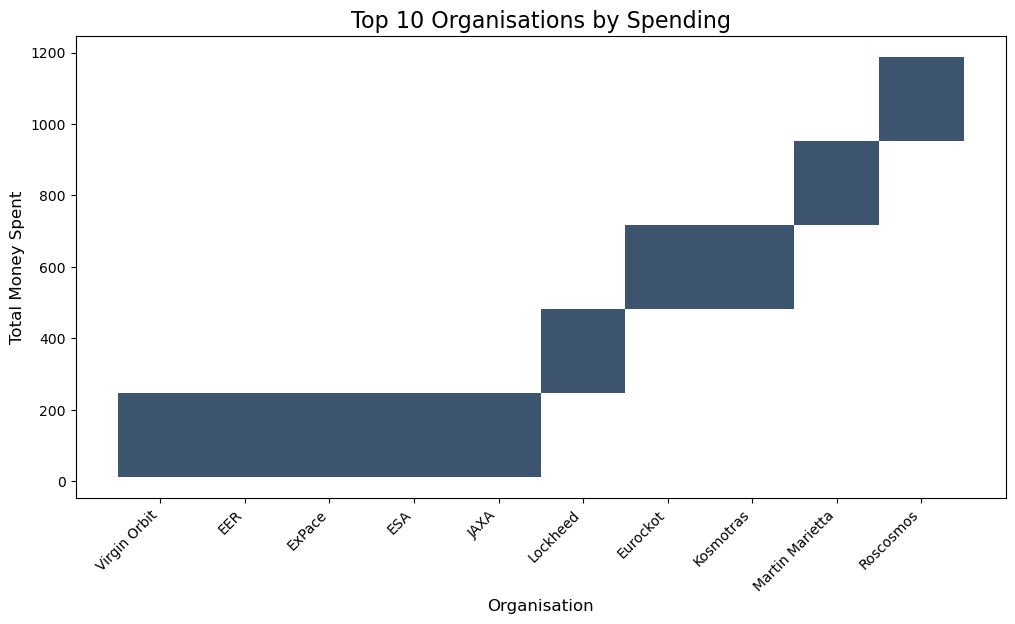

In [107]:
org_spending = dt.groupby('Organisation')['Price'].sum().reset_index()
plt.figure(figsize=(12,6))
sorted_dt = org_spending.sort_values(by='Price', ascending=True).head(10)
sns.histplot(data = sorted_dt, x = 'Organisation', y = 'Price', )

plt.xlabel('Organisation', fontsize=12)
plt.ylabel('Total Money Spent', fontsize=12)
plt.title('Top 10 Organisations by Spending', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.show()


# Number of Launches By Organisations:


In [111]:
df['Country'] = df['Location'].apply(lambda x: x.split()[-1])


In [113]:
country_corrections = {
    'Russia': 'Russian Federation',
    'New Mexico': 'United States of America',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'United States of America',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'United States of America'
}

df['Country'] = df['Country'].replace(country_corrections)


In [115]:
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except:
        return None

df['iso_alpha'] = df['Country'].apply(get_alpha3)


In [117]:
launch_counts = df.groupby('iso_alpha').size().reset_index(name='Launch_Count')


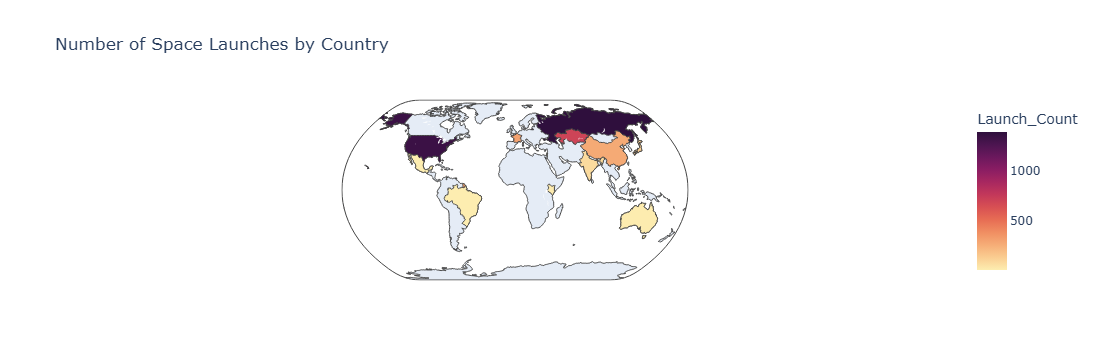

In [119]:



fig = px.choropleth(
    data_frame=launch_counts,
    locations='iso_alpha',
    color='Launch_Count',
    color_continuous_scale='matter',
    projection='natural earth',
    title='Number of Space Launches by Country'
)

fig.show()


# Choropleth Map to Show the Number of Failures by Country


In [288]:
failed_missions = df[df['Mission_Status'] == 'failure']

failed = failed_missions.groupby('iso_alpha').size().reset_index(name='Failure_Count')

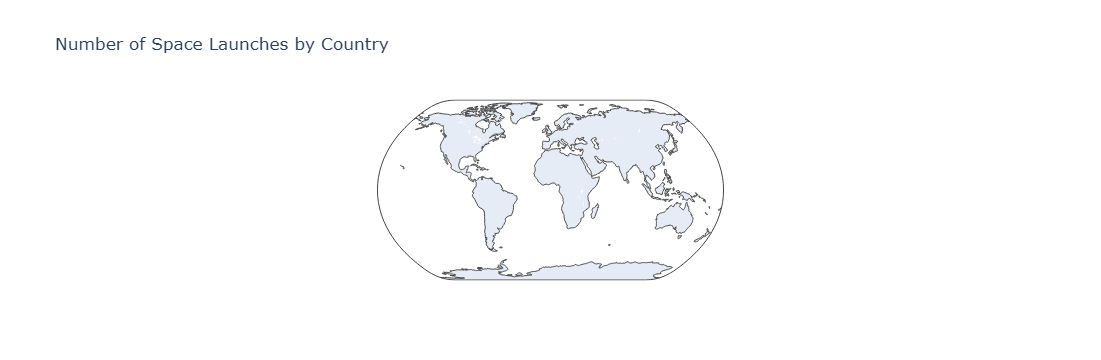

In [290]:
fig = px.choropleth(
    data_frame=failed,
    locations='iso_alpha',
    color='Failure_Count',
    locationmode='ISO-3',
    color_continuous_scale='matter',
    projection='natural earth',
    title='Number of Space Launches by Country'
)

fig.show()

# A Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [53]:
df_sunburst = df.dropna(subset=['iso_alpha', 'Organisation', 'Mission_Status'])

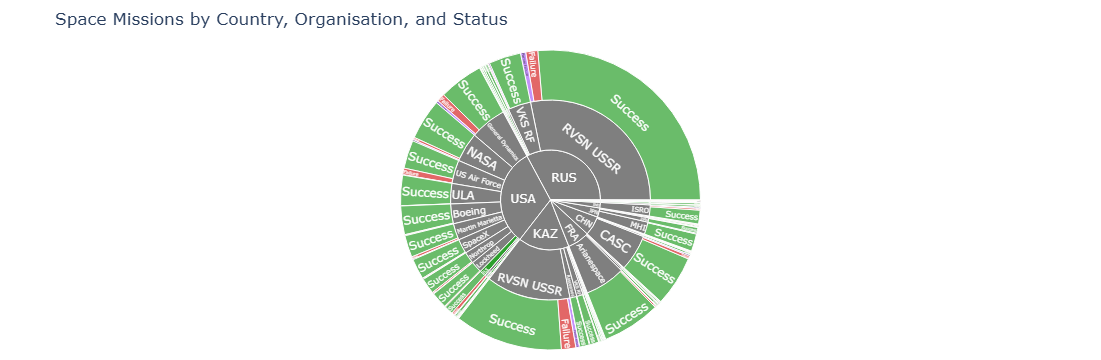

In [54]:
fig = px.sunburst(
    df_sunburst,
    path=['iso_alpha', 'Organisation', 'Mission_Status'], # Defines the hierarchy
    title="Space Missions by Country, Organisation, and Status",
    color='Mission_Status', # Colors the outer ring by mission status
    color_discrete_map={
        'Success':'#2ca02c',  # Green for Success
        'Failure':'#d62728',  # Red for Failure
        '(?)':'#7f7f7f'       # Gray for any other statuses
        }
)
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10)
)

fig.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [62]:
dt['Price'] = pd.to_numeric(dt['Price'], errors='coerce')
org_spending = dt.groupby('Organisation')['Price'].sum().reset_index()
org_spending.columns = ['Organisation', 'Total_Spent']
org_spending_sorted = org_spending.sort_values(by='Total_Spent', ascending=False)



C:\Users\12vat\AppData\Local\Temp\ipykernel_19164\1241206802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
print(org_spending_sorted)

       Organisation  Total_Spent
14             NASA    61,200.00
0       Arianespace    16,345.00
21              ULA    14,798.00
2              CASC     6,340.26
20           SpaceX     5,444.00
15         Northrop     3,930.00
12              MHI     3,532.50
8              ISRO     2,177.00
22     US Air Force     1,550.92
23           VKS RF     1,548.90
7               ILS     1,320.00
1            Boeing     1,241.00
18        Roscosmos     1,187.50
13  Martin Marietta       721.40
10        Kosmotras       638.00
5          Eurockot       543.40
11         Lockheed       280.00
9              JAXA       168.00
17       Rocket Lab        97.50
4               ESA        37.00
6            ExPace        28.30
3               EER        20.00
19           Sandia        15.00
24     Virgin Orbit        12.00
16        RVSN USSR         0.00


# The Amount of Money Spent by Organisation per Launch

In [69]:
launch_analysis = dt.groupby('Organisation')['Price'].agg(['sum', 'count']).reset_index()
launch_analysis.columns = ['Organisation', 'Total_Spent', 'Number_of_Launches']


In [70]:
launch_analysis['Avg_Spent_per_Launch'] = 0
mask = launch_analysis['Number_of_Launches'] > 0
launch_analysis.loc[mask, 'Avg_Spent_per_Launch'] = launch_analysis['Total_Spent'] / launch_analysis['Number_of_Launches']

C:\Users\12vat\AppData\Local\Temp\ipykernel_19164\2650258862.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[170.26041667 177.28571429  40.12822785  20.          37.
  41.8         28.3        101.53846154  32.49253731  56.
  29.          35.          95.47297297  80.15555556 450.
  47.34939759   7.5         51.63043478  15.          54.98989899
 151.          59.65076923  46.93636364  12.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [72]:
launch_analysis_sorted = launch_analysis.sort_values(by='Avg_Spent_per_Launch', ascending=False)
print(launch_analysis_sorted)

       Organisation  Total_Spent  Number_of_Launches  Avg_Spent_per_Launch
14             NASA    61,200.00                 136                450.00
1            Boeing     1,241.00                   7                177.29
0       Arianespace    16,345.00                  96                170.26
21              ULA    14,798.00                  98                151.00
7               ILS     1,320.00                  13                101.54
12              MHI     3,532.50                  37                 95.47
13  Martin Marietta       721.40                   9                 80.16
22     US Air Force     1,550.92                  26                 59.65
9              JAXA       168.00                   3                 56.00
20           SpaceX     5,444.00                  99                 54.99
18        Roscosmos     1,187.50                  23                 51.63
15         Northrop     3,930.00                  83                 47.35
23           VKS RF     1

# Number of Launches per Year

In [79]:
launch_analysis = dt.groupby('Organisation')['Date'].agg(['count']).reset_index()
launch_analysis.columns = ['Organisation', 'Launch_Count']

In [81]:
launch_sorted = launch_analysis.sort_values(by='Launch_Count', ascending=True)
print(launch_sorted)

       Organisation  Launch_Count
24     Virgin Orbit             1
6            ExPace             1
4               ESA             1
19           Sandia             1
3               EER             1
16        RVSN USSR             2
9              JAXA             3
1            Boeing             7
11         Lockheed             8
13  Martin Marietta             9
5          Eurockot            13
7               ILS            13
17       Rocket Lab            13
10        Kosmotras            22
18        Roscosmos            23
22     US Air Force            26
23           VKS RF            33
12              MHI            37
8              ISRO            67
15         Northrop            83
0       Arianespace            96
21              ULA            98
20           SpaceX            99
14             NASA           149
2              CASC           158


# Number of Launches over Time by the Top 10 Organisations. 


In [158]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed', utc=True)
df['Year'] = df['Date'].dt.year

In [160]:
top_10_orgs = df['Organisation'].value_counts().nlargest(10).index

In [275]:
df_top10 = df[df['Organisation'].isin(top_10_orgs)]
launches_over_time = df_top10.groupby(['Year', 'Organisation']).size().reset_index(name='NumberOfLaunches')

In [277]:
launches_over_time

,Year,Organisation,NumberOfLaunches


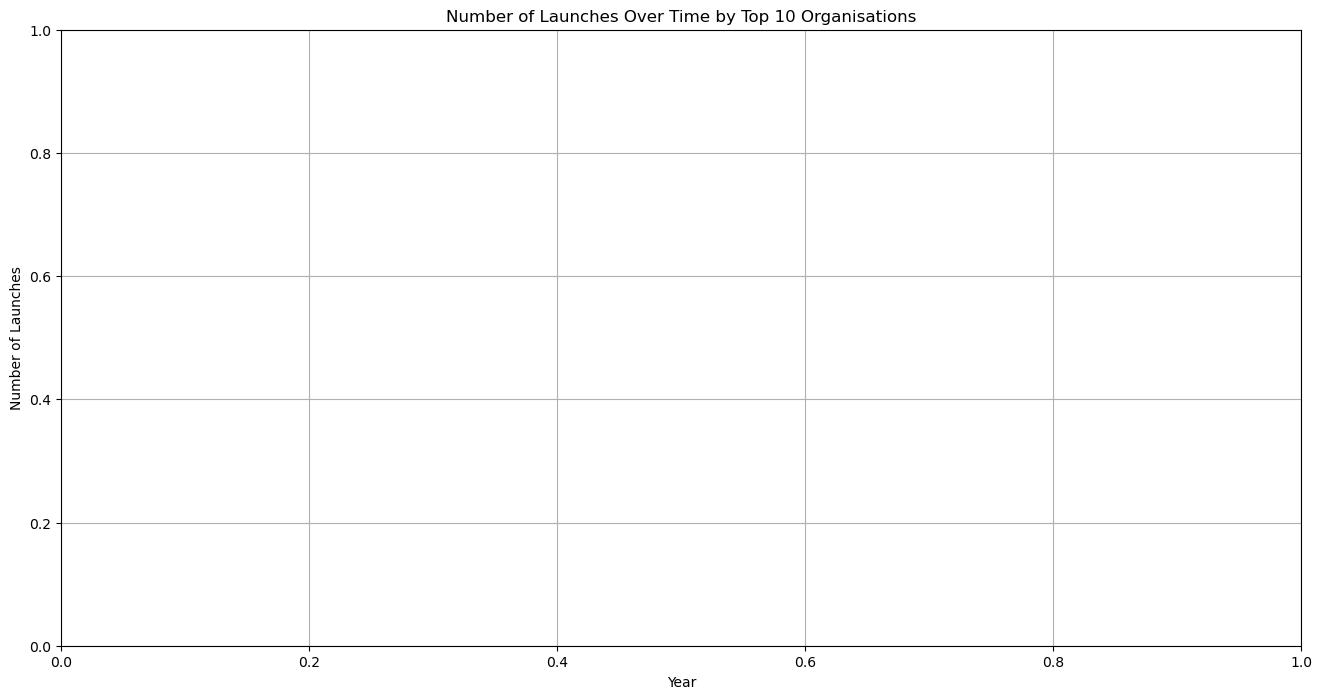

In [273]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=launches_over_time, 
             x='Year', 
             y='NumberOfLaunches', 
             hue='Organisation')

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Comparison of the total number of launches of the USSR and the USA

Former countries like kazakhastan has been included . 

In [279]:
usa_countries = ['USA']
ussr_countries = ['Russian Federation', 'Kazakhstan', 'RVSN USSR']

In [281]:
usa_launches = df['Country'].isin(usa_countries).sum()
ussr_launches = df['Country'].isin(ussr_countries).sum()


labels = ['USA', 'USSR (including former republics)']
values = [usa_launches, ussr_launches]

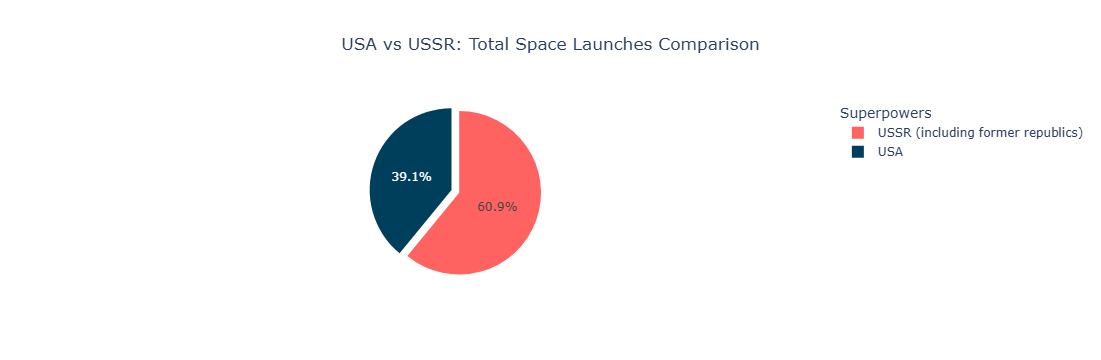

In [283]:
fig = go.Figure(data=[go.Pie(labels=labels,
                               values=values,
                               pull=[0, 0.1], 
                               marker_colors=['#003f5c', '#ff6361'])])

fig.update_layout(
    title_text='USA vs USSR: Total Space Launches Comparison',
    title_x=0.5,
    legend_title_text='Superpowers'
)

fig.show()

## Total Number of Launches Year-On-Year by the Two Superpowers

In [225]:
df['Year'] = df['Date'].dt.year

usa_countries = ['USA']
ussr_countries = ['Russian Federation', 'Kazakhstan', 'RVSN USSR']

df_usa = df[df['Country'].isin(usa_countries)]
df_ussr = df[df['Country'].isin(ussr_countries)]

In [228]:
usa_yearly_counts = df_usa['Year'].value_counts().sort_index()
ussr_yearly_counts = df_ussr['Year'].value_counts().sort_index()

yearly_launches = pd.DataFrame({
    'USA': usa_yearly_counts,
    'USSR': ussr_yearly_counts
}).fillna(0).astype(int).reset_index().rename(columns={'index': 'Year'})


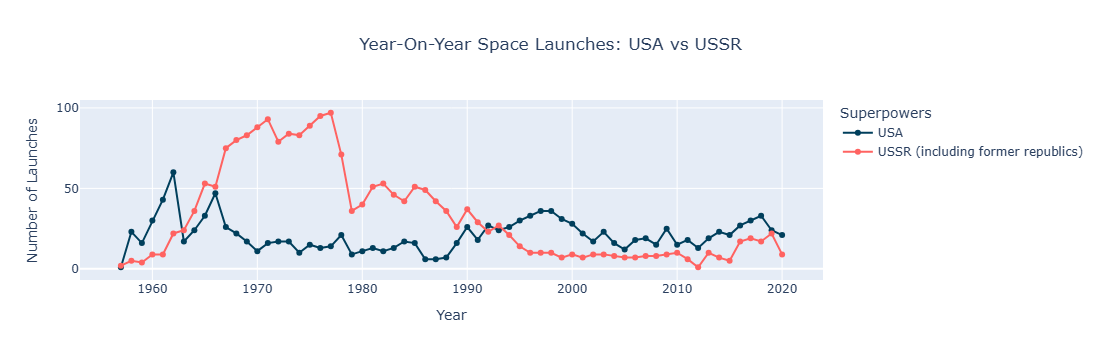

In [230]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=yearly_launches['Year'],
    y=yearly_launches['USA'],
    mode='lines+markers',
    name='USA',
    line=dict(color='#003f5c', width=2)
))


fig.add_trace(go.Scatter(
    x=yearly_launches['Year'],
    y=yearly_launches['USSR'],
    mode='lines+markers',
    name='USSR (including former republics)',
    line=dict(color='#ff6361', width=2)
))


fig.update_layout(
    title='Year-On-Year Space Launches: USA vs USSR',
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    title_x=0.5,
    legend_title_text='Superpowers'
)
fig.show()

## Total Number of Mission Failures Year on Year.

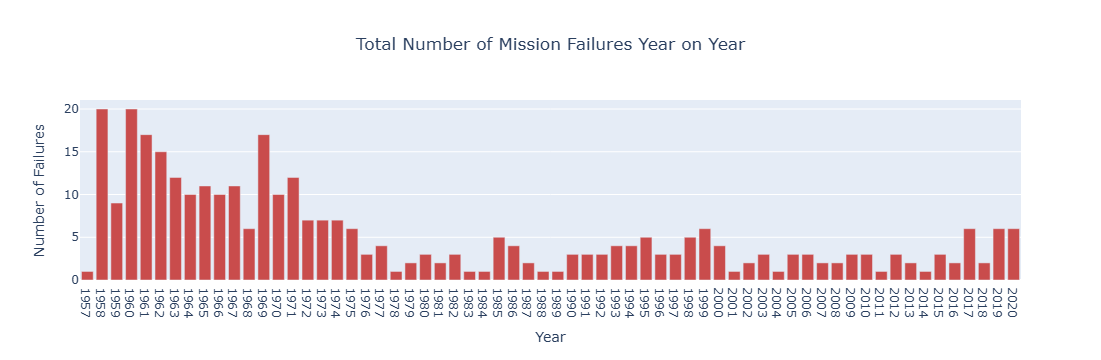

In [263]:
df['Year'] = df['Date'].dt.year


df_failures = df[df['Mission_Status'] == 'Failure']

yearly_failures = df_failures['Year'].value_counts().sort_index()

fig = go.Figure(go.Bar(
    x=yearly_failures.index,
    y=yearly_failures.values,
    marker_color='#c94c4c'
))

fig.update_layout(
    title='Total Number of Mission Failures Year on Year',
    xaxis_title='Year',
    yaxis_title='Number of Failures',
    title_x=0.5,
    xaxis_type='category' 
)

fig.show()

## Percentage of Failures over Time

Did failures go up or down over time? 

Did the countries get better at minimising risk and improving their chances of success over time? 

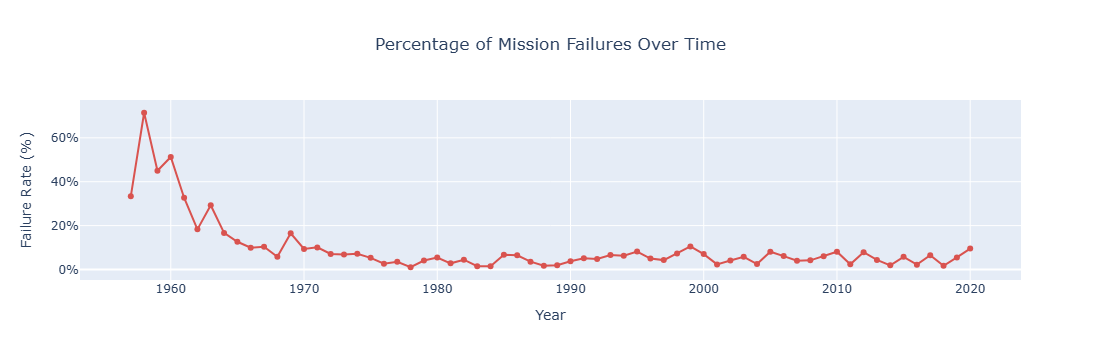

In [205]:
df['Year'] = df['Date'].dt.year

total_launches_yearly = df['Year'].value_counts().sort_index()

In [257]:

df_failures = df[df['Mission_Status'] == 'Failure']
yearly_failures = df_failures['Year'].value_counts().sort_index()


yearly_stats = pd.DataFrame({
    'TotalLaunches': total_launches_yearly,
    'Failures': yearly_failures
}).fillna(0) 

yearly_stats['FailurePercentage'] = (yearly_stats['Failures'] / yearly_stats['TotalLaunches']) * 100


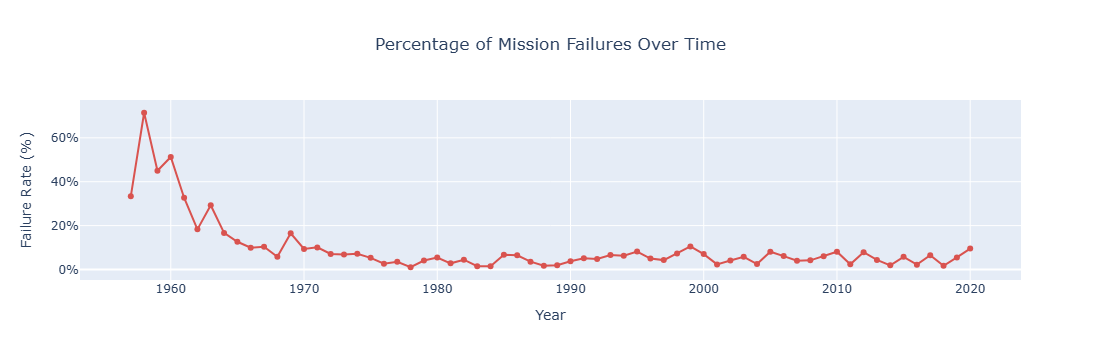

In [246]:
fig = go.Figure(go.Scatter(
    x=yearly_stats.index,
    y=yearly_stats['FailurePercentage'],
    mode='lines+markers',
    name='Failure Rate',
    line=dict(color='#d9534f', width=2)
))


fig.update_layout(
    title='Percentage of Mission Failures Over Time',
    xaxis_title='Year',
    yaxis_title='Failure Rate (%)',
    title_x=0.5,
    yaxis_ticksuffix='%'
)


fig.show()

# Country which was in the Lead in terms of Total Number of Launches up to and including including 2020 


In [255]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df_filtered = df[df['Year'] <= 2020].copy()


In [ ]:
total_launches = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='TotalLaunches')
leader_total = total_launches.loc[total_launches.groupby('Year')['TotalLaunches'].idxmax()]
leader_total = leader_total.rename(columns={'Country': 'Leader_Total_Launches', 'TotalLaunches': 'Count_Total'})


In [251]:
df_success = df_filtered[df_filtered['Mission_Status'] == 'Success'].copy()
successful_launches = df_success.groupby(['Year', 'Country']).size().reset_index(name='SuccessfulLaunches')
leader_success = successful_launches.loc[successful_launches.groupby('Year')['SuccessfulLaunches'].idxmax()]
leader_success = leader_success.rename(columns={'Country': 'Leader_Successful_Launches', 'SuccessfulLaunches': 'Count_Success'})

In [253]:
final_comparison = pd.merge(leader_total, leader_success, on='Year', how='outer')
final_comparison = final_comparison[['Year', 'Leader_Total_Launches', 'Count_Total', 'Leader_Successful_Launches', 'Count_Success']]

print(final_comparison)

    Year Leader_Total_Launches  Count_Total Leader_Successful_Launches  \
0   1957            Kazakhstan            2                 Kazakhstan   
1   1958                   USA           23                        USA   
2   1959                   USA           16                        USA   
3   1960                   USA           30                        USA   
4   1961                   USA           43                        USA   
..   ...                   ...          ...                        ...   
59  2016                   USA           27                        USA   
60  2017                   USA           30                        USA   
61  2018                 China           39                      China   
62  2019                 China           33                      China   
63  2020                 China           22                        USA   

    Count_Success  
0               2  
1               5  
2               6  
3              16  
4          

# A Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s?

Which organisation was dominant in 2018, 2019 and 2020? 

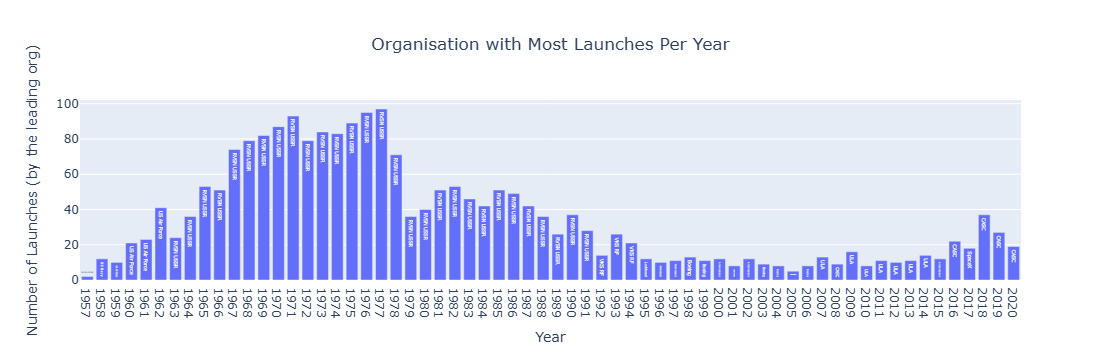

In [261]:
df['Year'] = df['Date'].dt.year

yearly_counts = df.groupby(['Year', 'Organisation']).size().reset_index(name='LaunchCount')
leader_per_year = yearly_counts.loc[yearly_counts.groupby('Year')['LaunchCount'].idxmax()]


fig = go.Figure(go.Bar(
    x=leader_per_year['Year'],
    y=leader_per_year['LaunchCount'],
    text=leader_per_year['Organisation'],
    textposition='auto'
))
fig.update_layout(
    title='Organisation with Most Launches Per Year',
    xaxis_title='Year',
    yaxis_title='Number of Launches (by the leading org)',
    title_x=0.5,
    xaxis_type='category'
)
fig.show()